<a href="https://colab.research.google.com/github/FaizaAli-Dev/AI-DS-Projects/blob/All-about-AI-and-Data-Science/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Digit recognition (using MNIST database) using convolutional neural networks**

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pylab as plt
np.random.seed (123)

In [2]:
img_x, img_y = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
y_train = to_categorical (y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = Sequential()

#filter size ( 5, 5 ), Filter extracts features
#stride size 1
model.add(Conv2D(32, kernel_size=(5, 5),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))

# stride size 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten ())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Relu can be used as well
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 85s 177ms/step - loss: 0.1498 - accuracy: 0.9536
Epoch 2/10
469/469 [==============================] - 75s 161ms/step - loss: 0.0406 - accuracy: 0.9874
Epoch 3/10
469/469 [==============================] - 76s 162ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 4/10
469/469 [==============================] - 76s 162ms/step - loss: 0.0211 - accuracy: 0.9932
Epoch 5/10
469/469 [==============================] - 68s 145ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 6/10
469/469 [==============================] - 69s 147ms/step - loss: 0.0125 - accuracy: 0.9961
Epoch 7/10
469/469 [==============================] - 67s 144ms/step - loss: 0.0111 - accuracy: 0.9963
Epoch 8/10
469/469 [==============================] - 67s 143ms/step - loss: 0.0075 - accuracy: 0.9973
Epoch 9/10
469/469 [==============================] - 68s 145ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 10/10
469/469 [==============================] - 68s 145ms/step - l

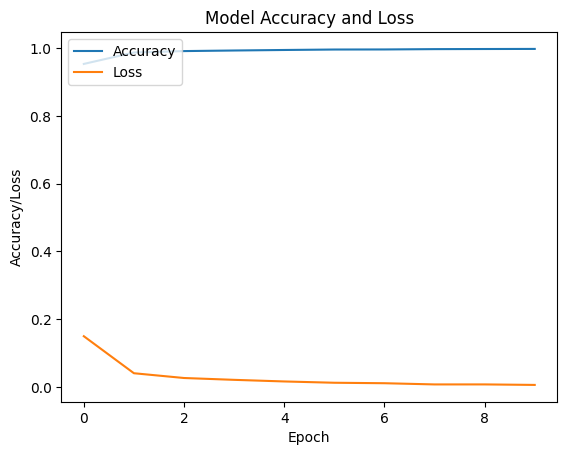

In [9]:
plt.plot (history.history['accuracy'])
plt.plot (history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend (['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04322734847664833
Test accuracy: 0.9894000291824341


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.2
)
datagen.fit(x_train)

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1420363336801529
Test accuracy: 0.9534000158309937


**Data Augmentation Working**

(318, 548, 3)


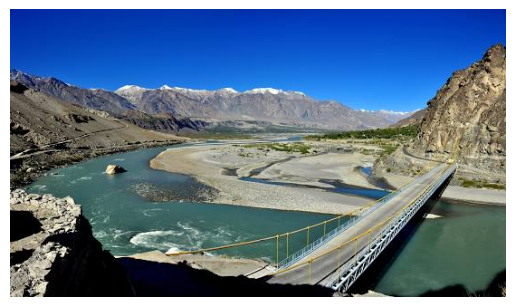

(1, 318, 548, 3)


In [18]:
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
image_path="/content/gb.jpg"
img = cv2.imread (image_path, cv2. IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print (img.shape)
plt.imshow(img_rgb)
plt.axis ("off")
plt.show()

#3D to 4D
img_rgb = img_rgb.reshape((1,)+img_rgb.shape)
print(img_rgb.shape)

datagen = ImageDataGenerator (rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

i = 0
for batch in datagen.flow(img_rgb, save_to_dir='/content/sample_data', save_prefix='Local_park', save_format='jpeg'):
  i += 1
  if i > 9:
    break